In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load dataset
df = pd.read_csv('IRIS_ Flower_Dataset.csv')

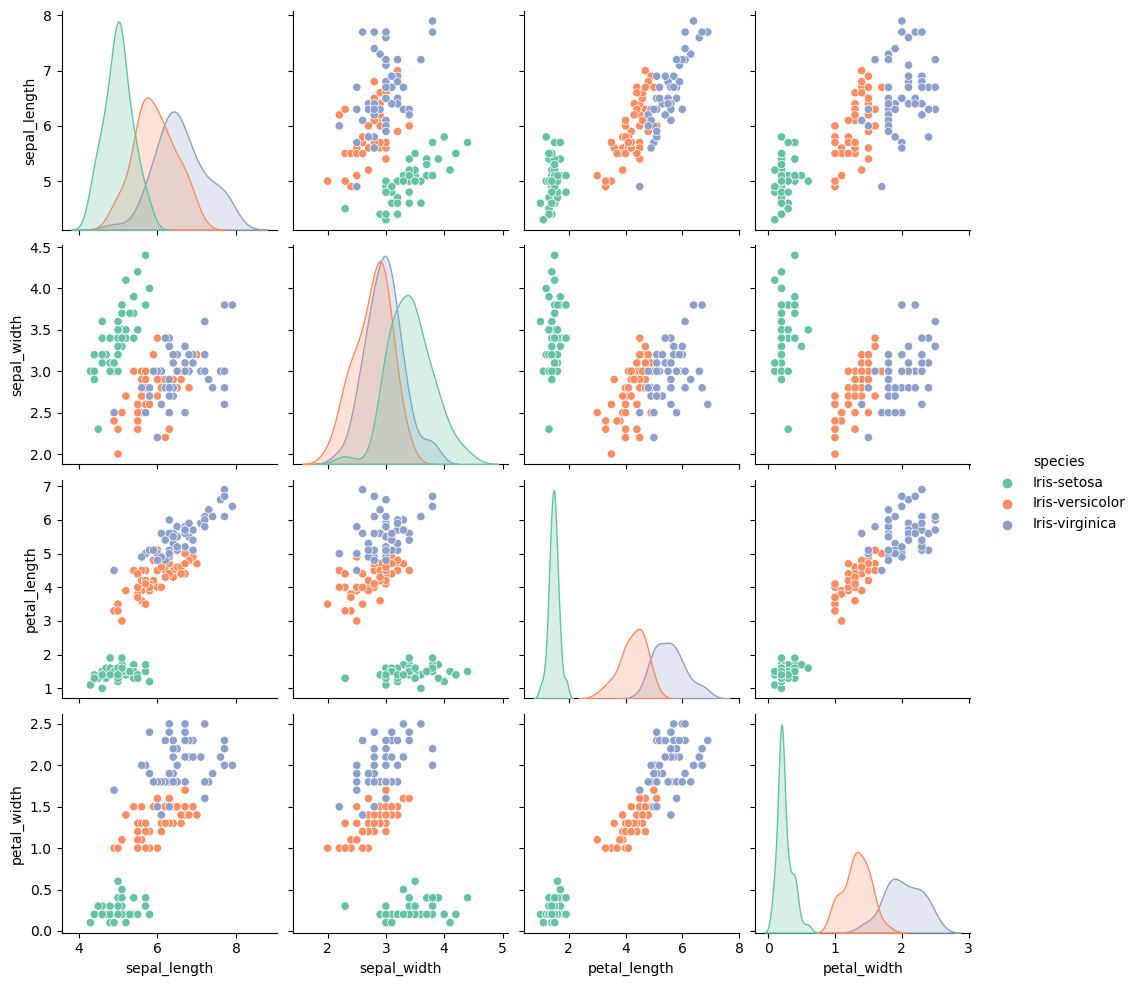

In [3]:
# Visualize data
species = df['species'].unique()
colors = ["green", "red", "blue"]
markers = ['+', '*', '^']
sns.pairplot(df, hue='species', palette='Set2')

Text(0, 0.5, 'Width (cm)')

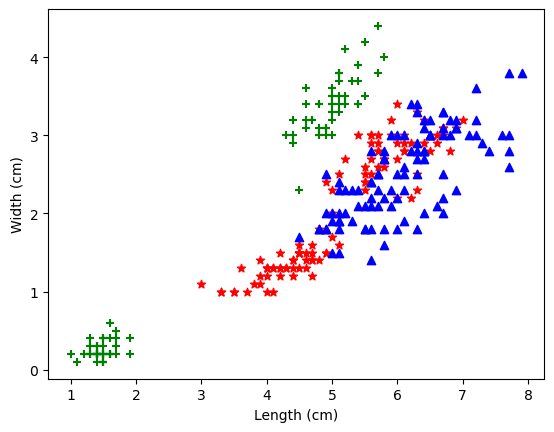

In [4]:
for i in range(len(species)):
    data = df[df.species == species[i]]
    plt.scatter(data['sepal_length'], data['sepal_width'], color=colors[i], marker=markers[i])
    plt.scatter(data['petal_length'], data['petal_width'], color=colors[i], marker=markers[i])

plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')

In [5]:
# Preprocess data
X = df.drop('species', axis=1)
y = LabelEncoder().fit_transform(df['species'])

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Create SVC model
model = SVC()

In [8]:
# Define parameters for optimization
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

In [9]:
# Perform Grid Search for hyperparameter tuning
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [10]:
# Train the model with best parameters
model = SVC(**grid.best_params_)
model.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [11]:
# Model prediction
y_pred = model.predict(X_test)

In [12]:
# Show classification report and confusion matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Model Accuracy: {model.score(X_test, y_test)}")

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Model Accuracy: 1.0


In [13]:
# Save the model
with open('iris_svc_model.pkl', 'wb') as file:
    pickle.dump(model, file)